In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import random
import sys
import os
import scipy
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')

from functions.visualization import retinotopic_map_plot
from ipywidgets import interact, Dropdown
from functions.preprocess import transform_polarangle_logbar, transform_eccentricity_logbar
from functions.evaluation import predicted_vs_empirical, return_list_of_subs, transform_polarangle
from deepRetinotopy_TheToolbox.utils.rois import ROI_WangParcelsPlusFovea as roi


## Convert polar angle maps

In [3]:
dataDir = '/BULK/ribeiro/datasets/ds004698/derivatives/'

for sub in os.listdir(dataDir + 'freesurfer'):
    for hemi in ['L', 'R']:
        if hemi == 'L':
            hemisphere = 'lh'
        else:
            hemisphere = 'rh'
        transform_polarangle_logbar(dataDir + 'prf-estimation/' + sub + '/prfs/' + sub + '_ses-all_task-logbar_hemi-' + hemi + '_space-fsnative_prf/'
                                    + sub + '_ses-all_task-logbar_hemi-' + hemi + '_space-fsnative_angle.gii')
        transform_polarangle_logbar(dataDir + 'freesurfer/' + sub + '/surf/' 
                                    + sub + '.fs_empirical_polarAngle_' + hemisphere + '.func.gii')
        transform_eccentricity_logbar(dataDir + 'freesurfer/' + sub + '/surf/' 
                                    + sub + '.fs_empirical_eccentricity_' + hemisphere + '.func.gii')
        transform_eccentricity_logbar(dataDir + 'freesurfer/' + sub + '/surf/' 
                                    + sub + '.fs_empirical_pRFsize_' + hemisphere + '.func.gii')


Polar angle map has been transformed and saved as /BULK/ribeiro/datasets/ds004698/derivatives/prf-estimation/sub-11/prfs/sub-11_ses-all_task-logbar_hemi-L_space-fsnative_prf/sub-11_ses-all_task-logbar_hemi-L_space-fsnative_angle_transformed.gii
Polar angle map has been transformed and saved as /BULK/ribeiro/datasets/ds004698/derivatives/freesurfer/sub-11/surf/sub-11.fs_empirical_polarAngle_lh_transformed.func.gii
Polar angle map has been transformed and saved as /BULK/ribeiro/datasets/ds004698/derivatives/freesurfer/sub-11/surf/sub-11.fs_empirical_eccentricity_lh_transformed.func.gii
Polar angle map has been transformed and saved as /BULK/ribeiro/datasets/ds004698/derivatives/freesurfer/sub-11/surf/sub-11.fs_empirical_pRFsize_lh_transformed.func.gii
Polar angle map has been transformed and saved as /BULK/ribeiro/datasets/ds004698/derivatives/prf-estimation/sub-11/prfs/sub-11_ses-all_task-logbar_hemi-R_space-fsnative_prf/sub-11_ses-all_task-logbar_hemi-R_space-fsnative_angle_transformed

(array([88., 85., 57., 42., 53., 34., 43., 27., 25., 33., 32., 32., 25.,
        21., 17., 30., 23., 28., 21., 20., 23., 10., 18., 24., 24., 16.,
        13., 29., 29., 20., 18., 15., 14., 12.,  9.,  5., 16.,  9., 11.,
         7., 13., 13.,  9.,  5., 18., 14., 12., 12.,  8.,  9.,  8., 10.,
         7., 10.,  7.,  6.,  7.,  3., 10.,  8.,  7.,  2.,  4.,  1.,  6.,
         4.,  2.,  5.,  2.,  9.,  3.,  2.,  4.,  9.,  3.,  5.,  1.,  3.,
         2.,  2.,  6.,  1.,  1.,  0.,  2.,  1.,  1.,  0.,  2.,  1.,  0.,
         1.,  3.,  1.,  3.,  2.,  0.,  1.,  0.,  3.]),
 array([0.0165297 , 0.11548446, 0.21443921, 0.31339398, 0.41234872,
        0.51130348, 0.61025822, 0.70921302, 0.80816776, 0.90712249,
        1.00607729, 1.10503209, 1.20398676, 1.30294156, 1.40189636,
        1.50085104, 1.59980583, 1.69876063, 1.79771531, 1.8966701 ,
        1.9956249 , 2.0945797 , 2.19353437, 2.29248905, 2.39144397,
        2.49039865, 2.58935332, 2.68830824, 2.78726292, 2.88621759,
        2.98517251, 3.0841

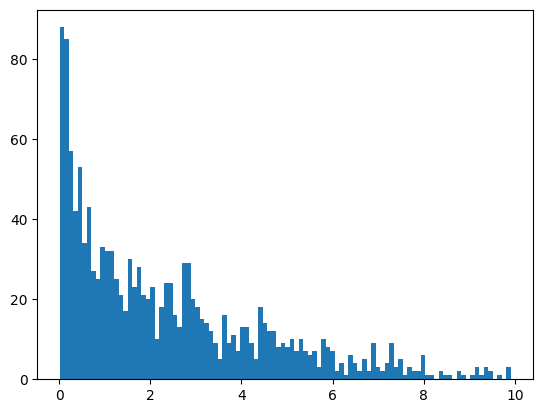

In [9]:
data = nib.load('/BULK/ribeiro/datasets/ds004698/derivatives/freesurfer/sub-01/surf/sub-01.fs_empirical_eccentricity_rh_transformed.func.gii').agg_data()
plt.hist(data[data>-1], bins=100)

In [3]:
# # checks
# data = nib.load('/BULK/ribeiro/datasets/ds004698/derivatives//prf-estimation/sub-11/prfs/sub-11_ses-all_task-logbar_hemi-L_space-fsnative_prf/sub-11_ses-all_task-logbar_hemi-L_space-fsnative_angle_transformed.gii').agg_data()
# plt.hist(data[data>-1], bins=100)

# data = nib.load('/BULK/ribeiro/datasets/ds004698/derivatives//prf-estimation/sub-11/prfs/sub-11_ses-all_task-logbar_hemi-R_space-fsnative_prf/sub-11_ses-all_task-logbar_hemi-R_space-fsnative_angle_transformed.gii').agg_data()
# plt.hist(data[data>-1], bins=100)

## Predicted vs empirical plots

Threshold: 0.1


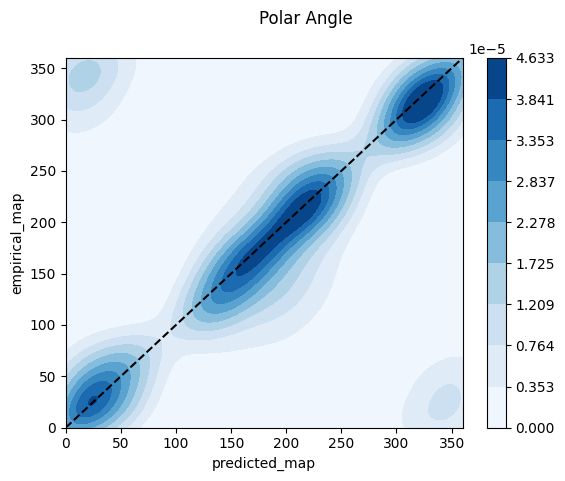

Threshold: 0.1


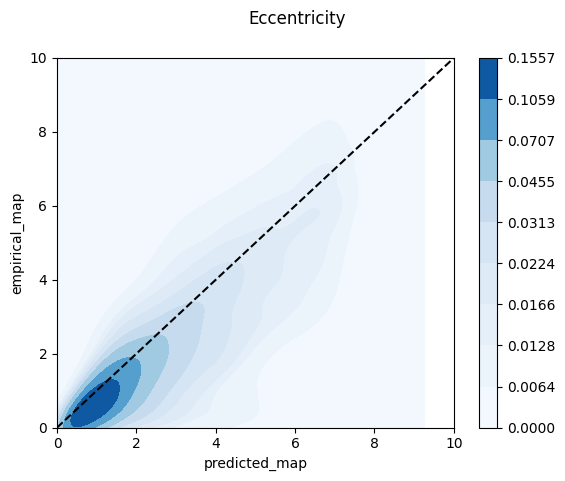

Threshold: 0.1


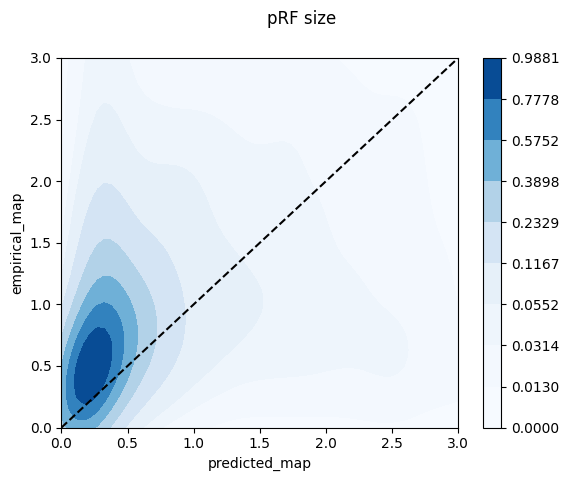

Threshold: 0.2


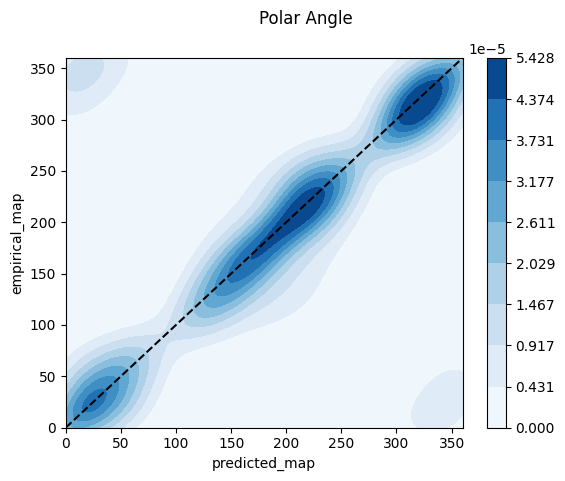

Threshold: 0.2


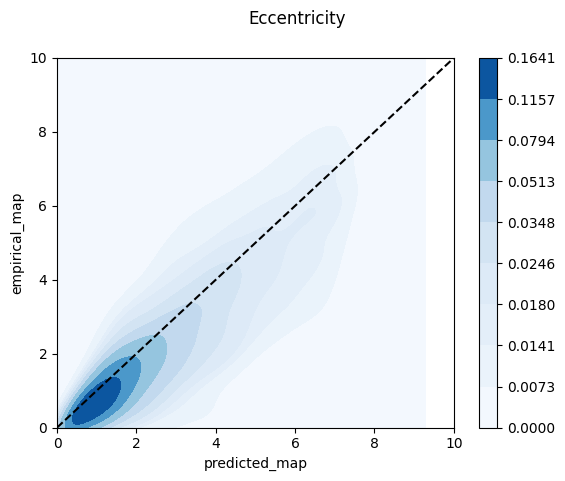

Threshold: 0.2


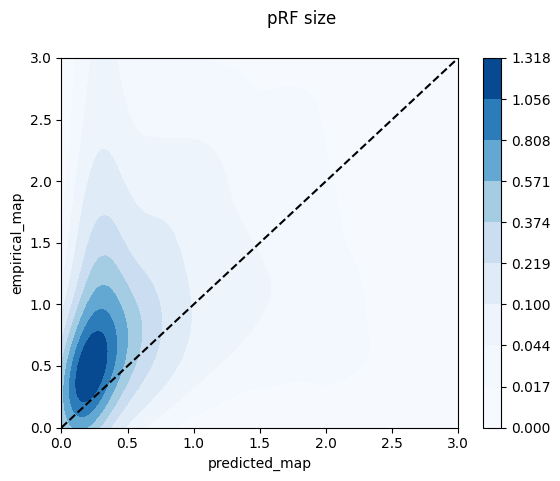

In [2]:
dataset_name = 'logbar'
path = '/BULK/ribeiro/datasets/ds004698/derivatives/freesurfer/'
retinotopic_maps = ['polarAngle', 'eccentricity', 'pRFsize']

for hemispheres in ['both',]:
    for threshold in [0.1, 0.2]:
        predicted_vs_empirical(path, dataset_name, retinotopic_maps, hemispheres = hemispheres, threshold=threshold)

In [19]:
indices = np.random.choice(np.linspace(0, 20000, 20000 + 1), 2000, replace=False)

In [21]:
len(indices)

2000